# Lecture 1. Probability distributions and error bars

## Definitions

- Population - a total collection of elements

- Sample - a subgroup of population

- Histogram rpovides a useful summary of a set of data - shows the *distribution* of the data. It is constructed by binning values and counting the number of observations in each bin.

- *Mean* and *stardart deviation* - are simple summaries of a set of data. They are *parametric statistics*, as they make implicit assumption about the form of the data.

Mean is designed to quantify the central tendency of a set of data

Standard deviation(STD) is designed to quantify the spread of a set of data

$$
mean(x)=\bar{x}=\frac{\sum\limits_{i=1}^{n}x_i}{n}
$$

$$
std(x)=\mu(x)=\sqrt{\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}{n-1}}
$$

* A probability distribution (probability density function) - is a mathematical function of one or more variables that describes the likelihood of observing any specific set of values for the variables.

Distributions can be *unvariative* (pertaining to one variable) or *multivariate* (pertaining to more than one variable);

'"to draw conclusion"`'

- *Nonparametric statictics* - median, interquartile range. They make minimal assumptions about the form of the data.

- *Xth percepntile* - value below which %th of the data points lay

- *Median* is the 50-th percentile

- *IQR (Interquartile range)* - the diffrenece metween 75th and 25th percentiles.

* *Noise* is any factor that contributes to variability in the measurement

* *Standart error* is the standart deviation of the sampling distribution of the statistic.

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

$\sigma$ is the standard deviation of the population  
$n$ is the size (number of observations) of the sample  

* *Confidence intervals* -  is that with repeated experiments, we can expect that *X%* of the time, the true populationparameter will be contained within *X%* confidence interval. Can be used as an indicator of uncertainty in the estimates.

## Probability distribution


A *probability distribution (or probability density function* is a mathematical function of one or more variables that describes the likelihood of observing any specific set of values for the variables.

Distributions can be *univariate* (pertraining to one variable) or *multivariate* (pertaining to more that one variable)

### Gaussian distribution

Also known as **normal** distribution. It is a very useful probability distribution. It is parametric in the sense that it places cartain constraints on the distribution of the data (the distribution must be unimodal, symmetric, etc.).

The Gaussian distribution has two parameters: the mean 
($\mu$) and the standard deviation ($\sigma$)


$$ pdf(x,\mu,\sigma) = \frac{1}{ \sigma\sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)}$$

For any given value $x$, this equation specifies how to compute $p(x)$, the likelihood of that value.

When points are drawn from a Gaussian distribution, 68% and 95% of the points will be within 1 and 2 standard deviations from the mean, respectively.

When computing the mean and standard deviation of a set of data, you are in a sense fitting a Gaussian distribution to the data.

An **advantage** of the Gaussian distribution is that it is simple and may be a reasonable approximation for many types of data. But what if the data are not Gaussian? If there is a suitable parametric probability for the data (e.g the Poisson distribution), we could choose to use it. Alternatively, we can adopt non-parametric techniques that take a more flexible approach, allowing the data themselves to determine the form of the probability distribution. Such techniques include **histograms, bootstrapping, kernel density estimation**.

## Nonparametric approaches to error bars

Let's assume that we have an sample that the underlying population distibution is Gaussion and we assumed that we want to estimate the mean. Let's drop these parametric assumptions - we use bootstraping to bypass the Gaussion assumption and let's compute the median instead of mean

### Bootstraping

1. Given a set of *n* data points
2. Draw *n* points with replacement from the data points and compute the median of the drawn points
3. Repeat the procedure many times, e.g. 10 000 times.
4. Summarize the resulting distribution using median and the 68% confidence interval

The reason for choosing the 68% confidence interval is that the range spanned by the 68% confidence interval is analogous to the range spanned by +/-1 standard error in the case of Gaussian error bars

Why does bootstrapping work? Recall that in the parametric approach to error bars, we assume a parametric probability distribution for the data and calculate error bars based on theoretical (analytical) considerations of what happens if we sample from that distribution. Bootstraping adheres to exactly the same logic, but has two deviations:

1. Instead of assuming a parametric probability distribution, the data themselves are used as an approximation of the underlying probability distribution.
2. Instead of calculating error bars analytically, brute computational force is used (random samples are drawn and the sampling distribution of the statistic is directly constructed)

## Nonparametric approaches to probability distributions

- Bootstrapping - can be used for characterizing probability distributions. The bootstrap estimate of the probability distribution that generated a set of data is simple a probability distribution consisting of a "spike" at each observed data point. This distribution looks a bit funny, but it is nonetheless a valid distribution - we can draw random samples from the distribution, just like any other probability distribution

- Histogram - to obtain an estimate of the probability distribution that generated a set of data, we simply construct a histogram of the data and then modify the scale of the *y*-axis so that the total area of the bars is equal to one

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


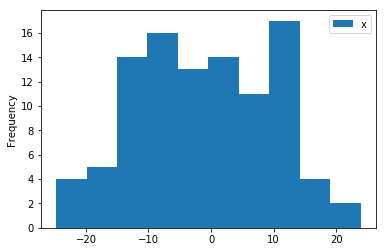

In [22]:
%pylab
%matplotlib inline


df = pd.DataFrame({
    'x': np.random.normal(1,10,[100])
})

df.plot.hist()


- Kernel density estimation (KDE)  
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28  
https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/  
https://scikit-learn.org/stable/modules/density.html  


yet another nonparametric technique for characterizing probability distributions. KDE is costructed by placing a *kernel* at each observer data point and averaging across kernels. Each kernel is itself a probability distribution.

KDE bridges the gap between bootstrapping and the histogram).  

On the one kand, KDE can be seen as a smooth version of the boostrap: instead of placing a sharp spike at each data point, we use a smooth bump. On the other hand, KDE can be seen as a more sophiscated version of the histogram

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


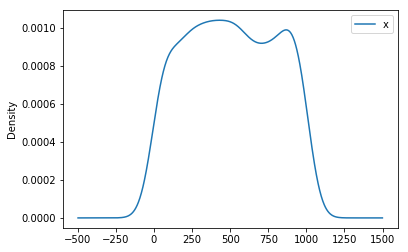

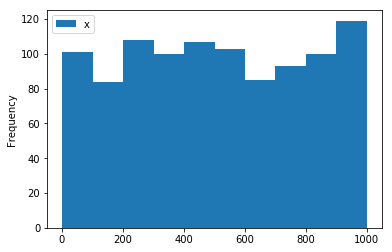

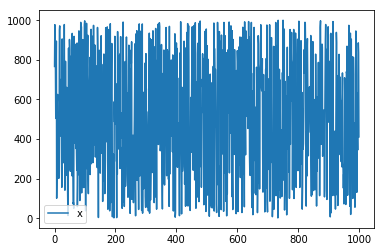

In [17]:
%pylab
%matplotlib inline

import numpy as np
import pandas as pd

df = pd.DataFrame({
    'x':np.random.uniform(1,1000,[1000])
})

ax = df.plot.kde()

df.plot.hist()
df.plot()